# Convolutional Neural Networks: Application

I will try to use Kaggle's ASL(American Sign Language) data and

- Create a letter classifer using the TF Keras Functional API
- Build a ConvNet to identify sign language first 4 (A,B,C,D) letter using the TF Keras Functional API

First Packages:

In [1]:
import os, shutil, pathlib
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from tensorflow.keras.utils import image_dataset_from_directory


%matplotlib inline
np.random.seed(1)

Create Directories for train, validation and test

In [2]:
original_dir = pathlib.Path("main")
new_base_dir = pathlib.Path("A_B")

In [3]:
#def make_subset(subset_name, start_index, end_index):
   # for category in ("A", "B", "C", "D"):
       # dir = new_base_dir / subset_name / category
        #os.makedirs(dir)
        #fnames = [f"{category}{i}.jpg" for i in range(start_index, end_index)]
        #for fname in fnames:
         #   shutil.copyfile(src=original_dir / fname,
       #                     dst=dir / fname)

#make_subset("train", start_index=1, end_index=2001)
#make_subset("validation", start_index=2001, end_index=2501)
#make_subset("test", start_index=2501, end_index=2999)

## Preprosessing Data for training
We create Train, Validation and Test data sets.

In [4]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(150, 150),
    batch_size=32,
    seed=123)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(150, 150),
    batch_size=32,
    seed=123)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(150, 150),
    batch_size=32,
    seed=123)

Found 8000 files belonging to 4 classes.
Found 2000 files belonging to 4 classes.
Found 1992 files belonging to 4 classes.


In [5]:
class_names = train_dataset.class_names
print(class_names)

['A', 'B', 'C', 'D']


# The images and labels that our model will learn

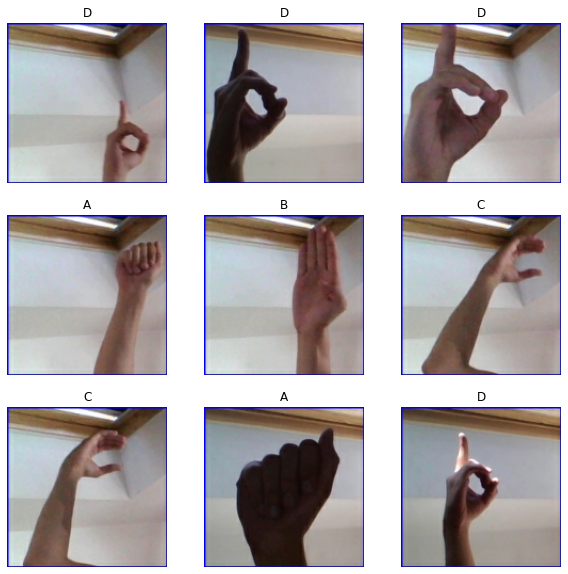

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
random_numbers = np.random.normal(size=(2000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [8]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 4:
        break

(16,)
(16,)
(16,)
(16,)
(16,)


In [9]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 4:
        break

(32, 16)
(32, 16)
(32, 16)
(32, 16)
(32, 16)


In [10]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 4:
        break

(4, 4)
(4, 4)
(4, 4)
(4, 4)
(4, 4)


In [11]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32,)


We define the model:

In [12]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_img = tf.keras.Input(shape=input_shape)
    ##n Normalizing Layers
    N1 = tf.keras.layers.Rescaling(1./255)(input_img)
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    Z1 = tf.keras.layers.Conv2D(32, 3, padding='SAME')(N1)
    ## RELU
    A1 = tf.keras.layers.ReLU()(Z1)
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tf.keras.layers.MaxPool2D(pool_size=(2,2))(A1)
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    Z2 = tf.keras.layers.Conv2D(64, 3, padding='SAME')(P1)
    ## RELU
    A2 = tf.keras.layers.ReLU()(Z2)
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tf.keras.layers.MaxPool2D(pool_size=(2,2))(A2)
    ##CONV2D
    Z3 = tf.keras.layers.Conv2D(128, 3, padding='SAME')(P2)
    ## RELU
    A3 = tf.keras.layers.ReLU()(Z3)
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P3 = tf.keras.layers.MaxPool2D(pool_size=(2,2))(A3)
    ##CONV2D
    Z4 = tf.keras.layers.Conv2D(128, 3, padding='SAME')(P3)
    ## RELU
    A4 = tf.keras.layers.ReLU()(Z4)
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P4 = tf.keras.layers.MaxPool2D(pool_size=(2,2))(A4)
    ## FLATTEN
    F = tf.keras.layers.Flatten()(P4)
    ##DENSE1:
    D1 = tf.keras.layers.Dense(512, activation='relu')(F)
    ## Dense layer
    outputs = tf.keras.layers.Dense(4, activation='softmax')(D1)
    
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [13]:
conv_model = convolutional_model((150, 150, 3))
conv_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [14]:
conv_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
rescaling (Rescaling)        (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
re_lu (ReLU)                 (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 75, 75, 64)        0     

In [15]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="accuracy")
]
history = conv_model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
250/250 [==============================] - 234s 930ms/step - loss: 0.4102 - accuracy: 0.8292 - val_loss: 1.3523 - val_accuracy: 0.6110
Epoch 2/10
250/250 [==============================] - 234s 936ms/step - loss: 0.0138 - accuracy: 0.9959 - val_loss: 2.3014 - val_accuracy: 0.6635
Epoch 3/10
250/250 [==============================] - 235s 941ms/step - loss: 2.3162e-04 - accuracy: 1.0000 - val_loss: 2.6408 - val_accuracy: 0.6400
Epoch 4/10
250/250 [==============================] - 234s 936ms/step - loss: 4.1790e-05 - accuracy: 1.0000 - val_loss: 2.7940 - val_accuracy: 0.6375
Epoch 5/10
250/250 [==============================] - 1022s 4s/step - loss: 2.0171e-05 - accuracy: 1.0000 - val_loss: 2.9273 - val_accuracy: 0.6340
Epoch 6/10
250/250 [==============================] - 234s 935ms/step - loss: 9.9387e-06 - accuracy: 1.0000 - val_loss: 3.0219 - val_accuracy: 0.6310
Epoch 7/10
250/250 [==============================] - 232s 929ms/step - loss: 6.0017e-06 - accuracy: 1.0000 - 

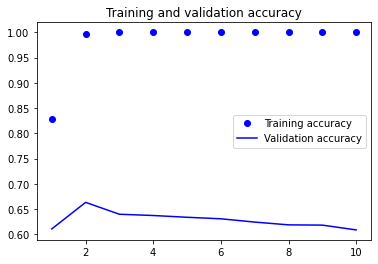

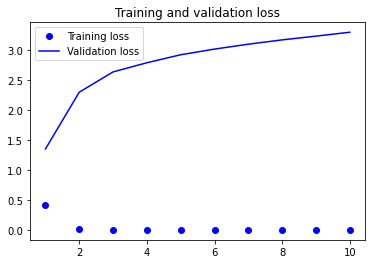

In [16]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

### As you see data is overfitting.
In order to solve overfitting, we will add augmented data and add a dropout layer.

In [19]:
data_augmentation = tf.keras.Sequential(
    [
        tfl.RandomFlip("horizontal"),
        tfl.RandomRotation(0.1),
        tfl.RandomZoom(0.2),
    ]
)

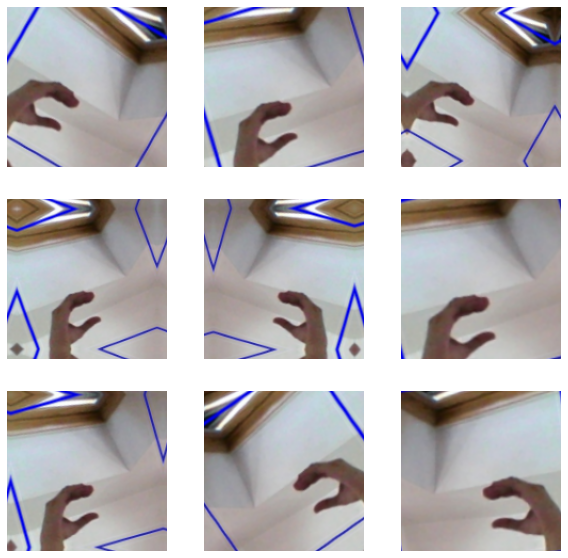

In [20]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [27]:
inputs = tf.keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)
x = tfl.Rescaling(1./255)(x)
x = tfl.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = tfl.MaxPooling2D(pool_size=2)(x)
x = tfl.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = tfl.MaxPooling2D(pool_size=2)(x)
x = tfl.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = tfl.MaxPooling2D(pool_size=2)(x)
x = tfl.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = tfl.MaxPooling2D(pool_size=2)(x)
x = tfl.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = tfl.Flatten()(x)
x = tfl.Dropout(0.5)(x)
outputs = tfl.Dense(4, activation="softmax")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [28]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, None, None, 3)     0         
_________________________________________________________________
rescaling_3 (Rescaling)      (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0   

In [35]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=1,
    validation_data=validation_dataset,
    callbacks=callbacks)

250/250 [==============================] - 247s 986ms/step - loss: 0.1055 - accuracy: 0.9841 - val_loss: 1.9181 - val_accuracy: 0.7570


In the end we still have less amount of data in order to achieve overfitting.
but next we will try to use pre-trained model in a new notebook.